<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

[K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering is a popular unsupervised machine learning algorithms. Unsupervised algorithms make inferences from datasets using only input vectors without target.  
The objective of K-means is to group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset. A cluster is a collection of data points grouped together because of certain similarities. You have to define the number of clusters or target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.
Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39.0
1,2,Male,21,15,81.0
2,3,Female,20,16,6.0
3,4,Female,23,16,77.0
4,5,Female,31,17,40.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  198 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


A few missing values in spending scores.

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,198.000000
mean,100.500000,38.850000,60.560000,50.202020
std,57.879185,13.969007,26.264721,25.953484
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.250000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


There are 5 input variables. we wont be using CustomerID since it is a unique identifier which does not give any information about customer behaviour.

<Figure size 1296x720 with 0 Axes>

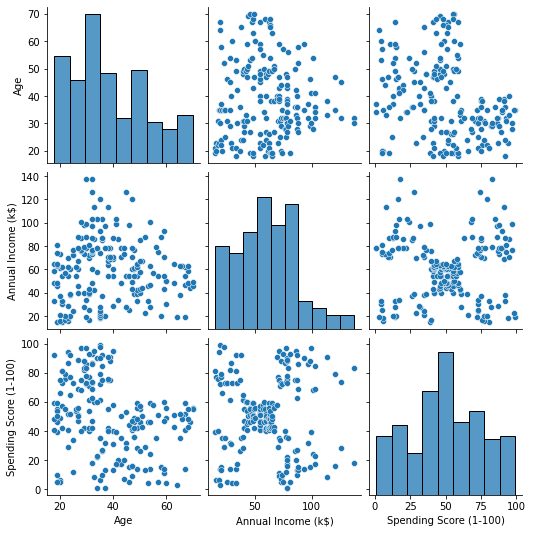

In [5]:
import seaborn as sns

plt.figure(figsize=(18,10))
sns.pairplot(df.drop('CustomerID', axis = 1))
plt.show()

In pair plot of Features, we can see that there is some cluster pattern in pair plot of spending score vs Annual Income.

<b>Missing values Imputation</b>

In [6]:
# Find where the missing values are
df[df['Spending Score (1-100)'].isnull()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
50,51,Female,49,42,NaN
77,78,Male,40,54,NaN


Fill the missing values in spending score by the mean spending score of similar customers.

In [7]:
# Mean spending score of 49 year old female customers.
mean_spending_score_1 = df[(df.Gender == 'Female') & (df.Age == 49)]['Spending Score (1-100)'].mean()

# Mean spending score of 40 year old male customers.
mean_spending_score_2 = df[(df.Gender == 'Male') & (df.Age == 40)]['Spending Score (1-100)'].mean()

print('Mean spending score of 49 year old female customers =', mean_spending_score_1)
print('Mean spending score of 40 year old Male customers =', mean_spending_score_2)

Mean spending score of 49 year old female customers = 38.2
Mean spending score of 40 year old Male customers = 54.0


In [8]:
# Fill the missing values
df.loc[50,'Spending Score (1-100)'] = mean_spending_score_1
df.loc[77,'Spending Score (1-100)'] = mean_spending_score_2

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No more missing values!

<b> Feature Encoding </b>  
Encode Gender Column since it contains string data type values.

In [10]:
df.Gender = df.Gender.apply(lambda x : 1 if x == 'Male' else 0)

<b>K Means Clustering</b>

In [12]:
# Using only Annual Income (k$) & Spending Score (1-100) for now!
X = df.iloc[:, [3, 4]].values

In [13]:
# Initialize k means model with 3 clusters (n_clusters = 3)
km = KMeans(n_clusters=3)

# Use fit_predict to train kmeans model and predict clusters
y_predicted = km.fit_predict(X)
print('Predicted cluster number of each record :',y_predicted)

Predicted cluster number of each record : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [14]:
# Store the generated cluster numbers in the df
df['cluster']=y_predicted
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
195,196,0,35,120,79.0,2
196,197,0,45,126,28.0,1
197,198,1,32,126,74.0,2
198,199,1,32,137,18.0,1
199,200,1,30,137,83.0,2


<b> Cluster Centers </b>  
Find the location of cluster centers

In [15]:
print('cluster coordinates :',km.cluster_centers_)

cluster coordinates : [[44.15447154 49.76585366]
 [87.         18.63157895]
 [86.53846154 82.12820513]]


In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39.0,0
1,2,1,21,15,81.0,0
2,3,0,20,16,6.0,0
3,4,0,23,16,77.0,0
4,5,0,31,17,40.0,0
...,...,...,...,...,...,...
195,196,0,35,120,79.0,2
196,197,0,45,126,28.0,1
197,198,1,32,126,74.0,2
198,199,1,32,137,18.0,1


<b>Visualize Clusters</b>

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hp\anaconda3\lib\site-pac

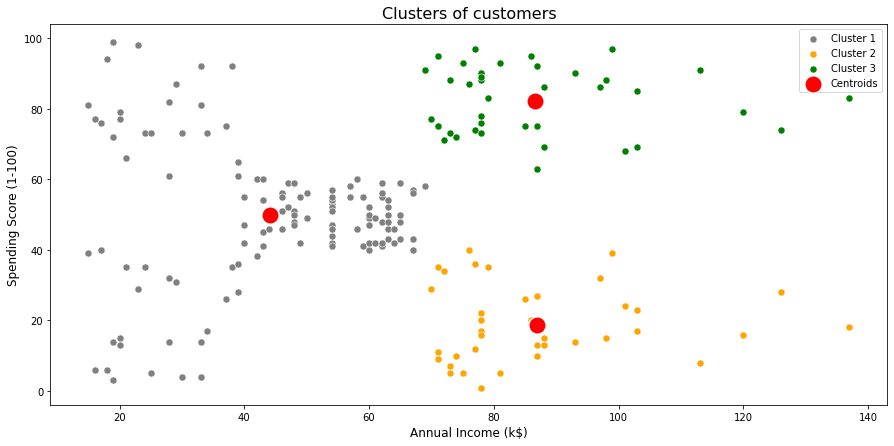

In [17]:
y_kmeans = df.cluster
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'grey', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'orange', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker='o')
plt.grid(False)
plt.title('Clusters of customers', fontsize = 16)
plt.xlabel('Annual Income (k$)', fontsize = 12)
plt.ylabel('Spending Score (1-100)', fontsize = 12)
plt.legend()
plt.show()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>
k-means minimizes the error function using the Newton algorithm, i.e. a gradient-based optimization algorithm. Feature Scaling improves convergence of such algorithms.

In [18]:
scaler = MinMaxScaler()
s1=MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_test=s1.fit_transform(X)

In [19]:
X

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

<b> Clustering again after Feature Scaling</b>

In [20]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(X)
print('Predicted cluster number of each record :',y_predicted)

Predicted cluster number of each record : [0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [21]:
# Save/Update cluster numbers in df
df['cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39.0,0
1,2,1,21,15,81.0,0
2,3,0,20,16,6.0,1
3,4,0,23,16,77.0,0
4,5,0,31,17,40.0,0


In [22]:
print('New Cluster Centers :',km.cluster_centers_)

New Cluster Centers : [[0.25631369 0.54193786]
 [0.46737705 0.1577551 ]
 [0.58638083 0.82783883]]


<b>Cluster Visualization</b>

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hp\anaconda3\lib\site-pac

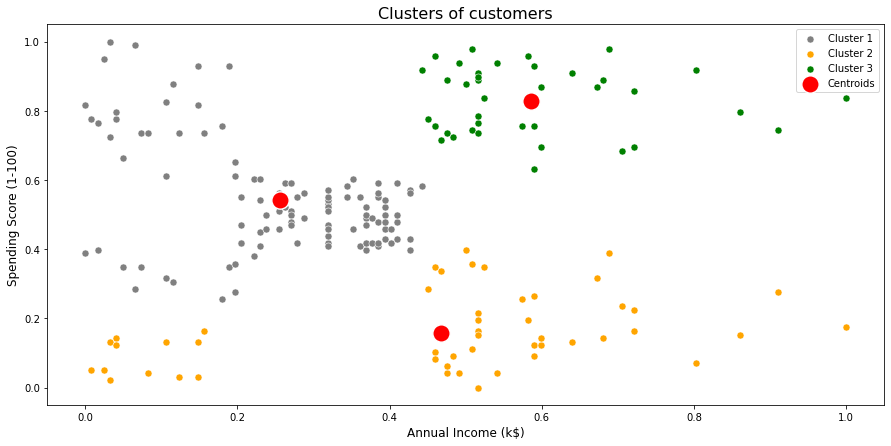

In [23]:
y_kmeans = df.cluster
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'grey', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'orange', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker='o')
plt.grid(False)
plt.title('Clusters of customers', fontsize = 16)
plt.xlabel('Annual Income (k$)', fontsize = 12)
plt.ylabel('Spending Score (1-100)', fontsize = 12)
plt.legend()
plt.show()

The Clusters are still not looking good. Lets tune the number of clusters.

<b>Elbow Plot</b>  
It is used to used to determine the number of clusters in a data set.you can read more about Elbow Plot [here](https://en.wikipedia.org/wiki/Elbow_method_(clustering)).

In [24]:
# Sum of squared errors
sse = []

# Range of clusters is 20
k_rng = range(1,20)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


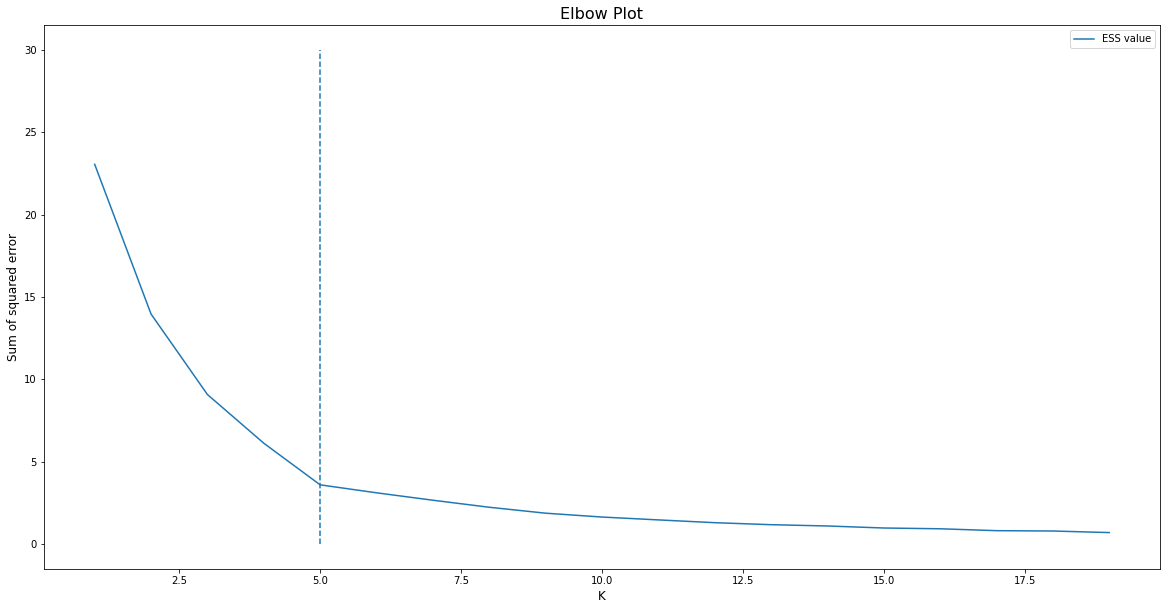

In [25]:
# Elbow plot
plt.figure(figsize = (20,10))
plt.plot(k_rng,sse, label = 'ESS value')
plt.vlines(5, 0,30,linestyles='dashed')

plt.title('Elbow Plot', fontsize = 16)
plt.xlabel('K', fontsize = 12)
plt.ylabel('Sum of squared error', fontsize = 12)

plt.legend()
plt.show()

From the elbow plot we see that after K=5, there is no significant decrease in the SSE. so, choose the number of lcusters = 5 and again do kmeans clustering.

<b>K-means with K = 5</b>

In [26]:
km = KMeans(n_clusters=5,random_state=0)
y_predicted = km.fit_predict(X)
print('New clusters :\n',y_predicted)

New clusters :
 [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


<b>Update Clusters</b>

In [27]:
df['cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39.0,4
1,2,1,21,15,81.0,3
2,3,0,20,16,6.0,4
3,4,0,23,16,77.0,3
4,5,0,31,17,40.0,4


In [28]:
print('New Cluster centers :\n',km.cluster_centers_)

New Cluster centers :
 [[0.6        0.16443149]
 [0.58638083 0.82783883]
 [0.33029751 0.49410431]
 [0.08792846 0.79962894]
 [0.09265859 0.20319432]]


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hp\anaconda3\lib\site-pac

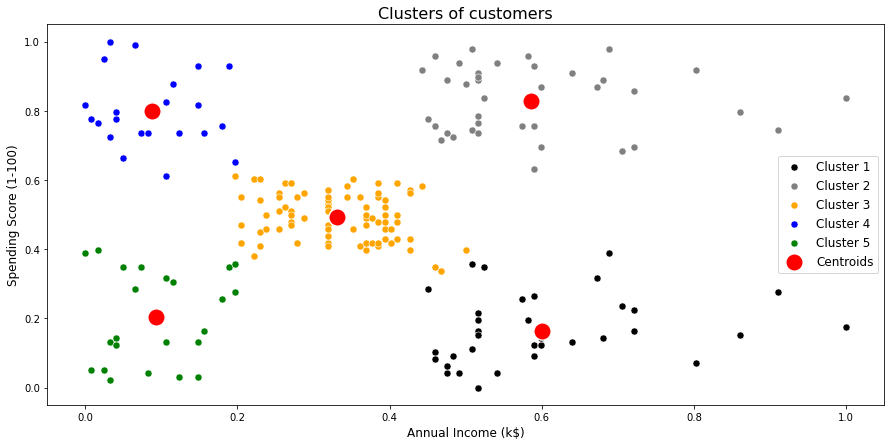

In [29]:
y_kmeans = df.cluster
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'black', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'grey', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'orange', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'blue', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'green', label = 'Cluster 5',s=50)
sns.scatterplot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker='o')
plt.grid(False)
plt.title('Clusters of customers', fontsize = 16)
plt.xlabel('Annual Income (k$)', fontsize = 12)
plt.ylabel('Spending Score (1-100)', fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

With k = 5, the clustering appears to be perfect.

<b>Exercise</b>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

# agglomerative cluastering

In [42]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [43]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
    
    
    print(kwargs)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [47]:
model.labels_

array([150, 169, 160, 171, 189, 117, 181, 165, 108, 155, 172, 112, 104,
       144, 153, 163, 131, 132, 167, 123, 191, 192, 159, 173, 177, 103,
       170, 187, 199, 147,  65, 185, 115, 105, 116, 168, 164, 114, 125,
       137,  84, 161, 152, 111, 127, 157, 124, 197, 198, 183, 120,  95,
       113, 100, 166, 139, 110, 175,  83, 134, 186, 156, 179, 188,  92,
        99, 146, 184, 176, 109,  41, 193, 128, 107,  91,  98, 182, 106,
       148,  90,  77,  87,  55, 121,  56,  54, 140,  79,  52, 149,  27,
        82, 194, 126,  96, 133, 154, 174, 151,  63, 180, 190, 130,  89,
       129,  69, 158,  94,  81, 118,  53, 145, 195, 141, 136,  66, 162,
        51, 119, 178,  75, 102,  62,  93,  72,  64,  86,  26, 142, 196,
       138,  85,  59,  68,  78,  61,  31,  40, 122,  80,  25,  49,  42,
       101,  44,  45,  73,  39,  70,  76,  88,  43, 143,  71,  35, 135,
        97,  34,  30,  74,  48,  32,  21,  60,  36,  38,  15,  57,  58,
        19,  46,  50,  24,  29,  47,  28,  67,  22,  12,  20,  3

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

{'truncate_mode': 'level', 'p': 4}


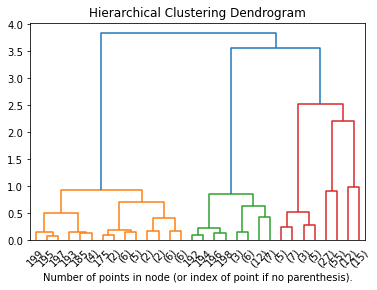

In [46]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model,truncate_mode="level",p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()